# PILLOW
## 1. Was ist Pillow?

Pillow ist eine Python library, die verwendet wird, um Image-Dateien zu öffnen, zu manipulieren und zu analysieren.
Pillow ist der Nachfolger von Python Imaging Library (PIL) und baut darauf auf. 
- hat mehr Funktionalitäten
- unterstützt eine Vielzahl an Image-Dateien: jpeg, png, tiff, gif, etc. 


## 2. Pillow basics
### 2.1 read, display, examine, save

In [1]:
from PIL import Image

In [2]:
# ein Bild anzeigen
image1 = Image.open("flamingo.jpg") # ein Image-Objekt kreieren
image1.show() # öffnet ein Preview (temp)

In [3]:
image2 = Image.open("zueri.jpg")
image2.show()

In [71]:
# Dateiinhalte anschauen:
print(image1.format, image1.size, image1.mode)

print(image2.format, image2.size, image2.mode)

JPEG (4032, 3017) RGB
JPEG (4032, 3024) RGB


format:
- Format eines Bildes
- bspw. JPEG, PNG, GIF, etc. 

size:
- Breite x Länge in Pixel

mode:
- Format der Pixel
- L = greyscale images
- RGB = true color images
- CMYK = pre-press images

In [4]:
# ein Bild abspeichern (bspw. in einem anderen Format)
image1.save("flamingo.png")

In [5]:
# mehrere Files abspeichern (mittels loop; in einem anderen Format)
import os

In [6]:
for f in os.listdir("."): # loopt durch die current directory
    if f.endswith(".jpg"):
        #print(f)
        i = Image.open(f) # macht aus jedem File ein Image object
        fn, fext = os.path.splitext(f) # spaltet filename and file extension
        i.save("my_pngs/{}.png".format(fn)) # speichert das Bild als png im Ordner "my_pngs" mit dem alten Filename ab

### 2.2 manipulations

In [7]:
# resize files (bspw. für einen Thumbnail)

size_300 = (300, 300) # die neue, erwünschte Bildgrösse wird in einem Tuple gespeichert

for f in os.listdir("."): 
    if f.endswith(".jpg"):
        i = Image.open(f) 
        fn, fext = os.path.splitext(f)
        
        i.thumbnail(size_300)
        i.save("pics_300/{}_300{}".format(fn, fext))

In [9]:
# rotate
image2 = Image.open("zueri.jpg")
image2.show()
#image2.rotate(90).save("zueri_mod.jpg")
image2 = image2.rotate(90) # Anzahl Grade
image2.show()

In [11]:
# change color
image3 = Image.open("christmas.jpg")
image3.show()
image3 = image3.convert(mode = "L") # B&W
image3.show()

In [12]:
# blur
from PIL import ImageFilter
image4 = Image.open("schweden.jpg")
image4.show()
image4 = image4.filter(ImageFilter.GaussianBlur(10)) # radius = 10; default = 2 
image4.show()

In [15]:
# cutting, pasting and merging images
# cut
image2 = Image.open("zueri.jpg")
image2.show()
box = (1250, 1250, 2000, 2000) # left, upper, right, lower; (0,0) is in the upper-left corner
region = image2.crop(box)
region.show()

In [14]:
# process subrectangle, paste it back
region = region.rotate(180)
image2.paste(region, box)
image2.show()

In [17]:
# enhancing images
from PIL import ImageEnhance
image4 = Image.open("schweden.jpg")
image4.show()
enh = ImageEnhance.Contrast(image4)
enh.enhance(1.5).show("50% more contrast")

### 2.3 statistics

Farben lassen sich durch 3 Angaben definieren. Im RGB-Farbraum wird eine Farbe durch den Rot-, Grün- und Blauanteil definiert. 
Jede der drei Farben wird mit jeweils 8 Bit angegeben. Das heisst, pro Farbe sind 255 Werte/Farbausprägungen möglich.
- rote Anteile: 0-255
- grüne Anteile: 256-511
- blaue Anteile: 512-767

In [19]:
# colors
from PIL import ImageColor

blue = ImageColor.getrgb("blue")
print(blue) # R = 0, G = 0, B = 255

pink = ImageColor.getrgb("pink")
print(pink) # R = 255, G = 192, B = 203

(0, 0, 255)
(255, 192, 203)


Die jeweiligen Farbanteile eines Bildes können wir in einem Histogramm darstellen.

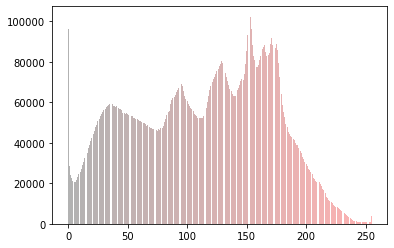

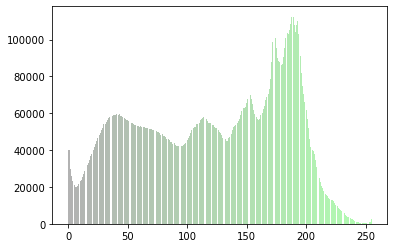

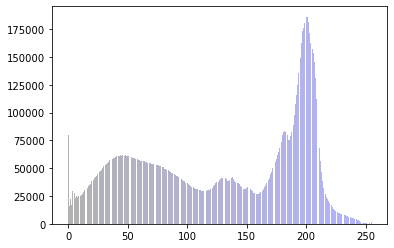

In [20]:
import matplotlib.pyplot as plot

def getRed(R): return '#%02x%02x%02x'%(R,0,0) # Hexa-Decimal Color String jeder Farbe
def getGreen(G): return '#%02x%02x%02x'%(0,G,0)
def getBlue(B):return '#%02x%02x%02x'%(0,0,B)


image2 = Image.open("zueri.jpg") # das zu analysierende Bild einlesen
hst=image2.histogram() # Histogramm des Bildes (pixel counts)
Red=hst[0:256]      # Werte für rot
Green=hst[256:512]  # Werte für grün
Blue=hst[512:768]   # Werte für blau

plot.figure(0)             # Histogramm für rote Farbanteile
for i in range(0, 256):
    plot.bar(i, Red[i], color = getRed(i),alpha=0.3)

plot.figure(1)             # Histogramm für grüne Farbanteile
for i in range(0, 256):
    plot.bar(i, Green[i], color = getGreen(i),alpha=0.3)

plot.figure(2)             # Histogramm für blaue Anteile
for i in range(0, 256):
    plot.bar(i, Blue[i], color = getBlue(i),alpha=0.3)
    
plot.show()

--> zeigt wie viele rote, grüne und blaue Pixel in einem Bild sind pro (255) Farbausprägung

### 2.4 Pillow & NumPy

In [22]:
# create an image from a NumPy array

import numpy as np
arr = np.zeros([150, 250, 3], dtype=np.uint8) # create a 150x250 pixel array
arr[:,:100] = [255, 128, 0] # fill the left half with orange
arr[:,100:] = [0, 0, 255] # fill the right half with blue

new_img = Image.fromarray(arr)
new_img.show()

new_img.save("RGB_image.jpg")

In [25]:
# create numpy array from an image
from PIL import Image
from numpy import array

# open image & create image object
image4 = Image.open("schweden.jpg")
image4.show()

# convert image object to numpy array
img2arr = array(image4)

# print array
print(img2arr)

[[[47 51 78]
  [46 50 77]
  [44 48 75]
  ...
  [57 52 82]
  [60 55 85]
  [62 57 87]]

 [[47 51 78]
  [45 49 76]
  [44 48 75]
  ...
  [58 53 83]
  [59 54 84]
  [60 55 85]]

 [[46 50 77]
  [45 49 76]
  [44 48 75]
  ...
  [59 54 84]
  [59 54 84]
  [59 54 84]]

 ...

 [[11  6 12]
  [12  7 13]
  [13  8 14]
  ...
  [17 10 18]
  [17 10 18]
  [17 10 18]]

 [[11  6 12]
  [12  7 13]
  [13  8 14]
  ...
  [16  9 17]
  [18 11 19]
  [19 12 20]]

 [[11  6 12]
  [12  7 13]
  [13  8 14]
  ...
  [16  9 17]
  [18 11 19]
  [20 13 21]]]
